In [56]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as pyp
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score

In [57]:
os.chdir("C:\\Users\\khush\\OneDrive\\Documents\\csv\\")
calories = pd.read_csv("calories.csv")
calories

,User_ID,Calories
0,14733363,231.0
1,14861698,66.0
2,11179863,26.0
3,16180408,71.0
4,17771927,35.0
...,...,...
14995,15644082,45.0
14996,17212577,23.0
14997,17271188,75.0
14998,18643037,11.0


In [3]:
exercise = pd.read_csv("exercise.csv")
exercise

,User_ID,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp
0,14733363,male,68,190.0,94.0,29.0,105.0,40.8
1,14861698,female,20,166.0,60.0,14.0,94.0,40.3
2,11179863,male,69,179.0,79.0,5.0,88.0,38.7
3,16180408,female,34,179.0,71.0,13.0,100.0,40.5
4,17771927,female,27,154.0,58.0,10.0,81.0,39.8
...,...,...,...,...,...,...,...,...
14995,15644082,female,20,193.0,86.0,11.0,92.0,40.4
14996,17212577,female,27,165.0,65.0,6.0,85.0,39.2
14997,17271188,female,43,159.0,58.0,16.0,90.0,40.1
14998,18643037,male,78,193.0,97.0,2.0,84.0,38.3


In [4]:

dataset = pd.concat([exercise,calories["Calories"]],axis=1)

In [5]:
dataset

,User_ID,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories
0,14733363,male,68,190.0,94.0,29.0,105.0,40.8,231.0
1,14861698,female,20,166.0,60.0,14.0,94.0,40.3,66.0
2,11179863,male,69,179.0,79.0,5.0,88.0,38.7,26.0
3,16180408,female,34,179.0,71.0,13.0,100.0,40.5,71.0
4,17771927,female,27,154.0,58.0,10.0,81.0,39.8,35.0
...,...,...,...,...,...,...,...,...,...
14995,15644082,female,20,193.0,86.0,11.0,92.0,40.4,45.0
14996,17212577,female,27,165.0,65.0,6.0,85.0,39.2,23.0
14997,17271188,female,43,159.0,58.0,16.0,90.0,40.1,75.0
14998,18643037,male,78,193.0,97.0,2.0,84.0,38.3,11.0


In [6]:
dataset.describe()

,User_ID,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories
count,1.500000e+04,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000
mean,1.497736e+07,42.789800,174.465133,74.966867,15.530600,95.518533,40.025453,89.539533
std,2.872851e+06,16.980264,14.258114,15.035657,8.319203,9.583328,0.779230,62.456978
min,1.000116e+07,20.000000,123.000000,36.000000,1.000000,67.000000,37.100000,1.000000
25%,1.247419e+07,28.000000,164.000000,63.000000,8.000000,88.000000,39.600000,35.000000
50%,1.499728e+07,39.000000,175.000000,74.000000,16.000000,96.000000,40.200000,79.000000
75%,1.744928e+07,56.000000,185.000000,87.000000,23.000000,103.000000,40.600000,138.000000
max,1.999965e+07,79.000000,222.000000,132.000000,30.000000,128.000000,41.500000,314.000000


In [7]:

dataset.info()

#no null value in dataset.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   User_ID     15000 non-null  int64  
 1   Gender      15000 non-null  object 
 2   Age         15000 non-null  int64  
 3   Height      15000 non-null  float64
 4   Weight      15000 non-null  float64
 5   Duration    15000 non-null  float64
 6   Heart_Rate  15000 non-null  float64
 7   Body_Temp   15000 non-null  float64
 8   Calories    15000 non-null  float64
dtypes: float64(6), int64(2), object(1)
memory usage: 1.0+ MB


In [22]:
encoder = preprocessing.LabelEncoder()
dataset["Gender"] = encoder.fit_transform(dataset["Gender"])
dataset
#male = 1 and female = 0.

,User_ID,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories
0,14733363,1,68,190.0,94.0,29.0,105.0,40.8,231.0
1,14861698,0,20,166.0,60.0,14.0,94.0,40.3,66.0
2,11179863,1,69,179.0,79.0,5.0,88.0,38.7,26.0
3,16180408,0,34,179.0,71.0,13.0,100.0,40.5,71.0
4,17771927,0,27,154.0,58.0,10.0,81.0,39.8,35.0
...,...,...,...,...,...,...,...,...,...
14995,15644082,0,20,193.0,86.0,11.0,92.0,40.4,45.0
14996,17212577,0,27,165.0,65.0,6.0,85.0,39.2,23.0
14997,17271188,0,43,159.0,58.0,16.0,90.0,40.1,75.0
14998,18643037,1,78,193.0,97.0,2.0,84.0,38.3,11.0


Text(0.5, 0, 'Gender')

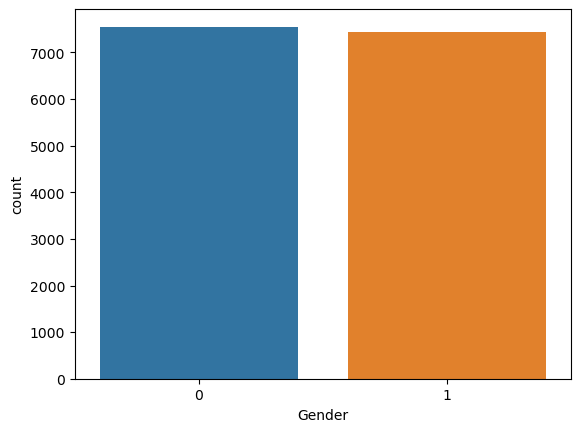

In [23]:
#applying data analytics to check the relationship between all the rows and columns.
sns.countplot(x=dataset["Gender"])
pyp.xlabel("Gender")
#Equal number of male and female.

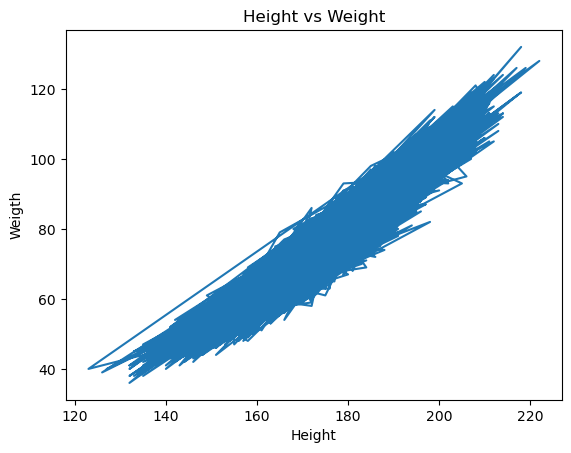

In [9]:
pyp.plot(dataset["Height"],dataset["Weight"])
pyp.title("Height vs Weight")
pyp.xlabel("Height")
pyp.ylabel("Weigth")
pyp.show()

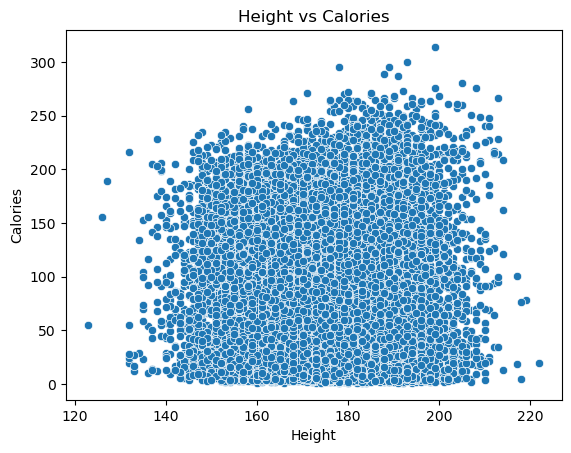

In [10]:

sns.scatterplot(x="Height",y="Calories", data=dataset)
pyp.title("Height vs Calories")
pyp.xlabel("Height")
pyp.ylabel("Calories")
pyp.show()

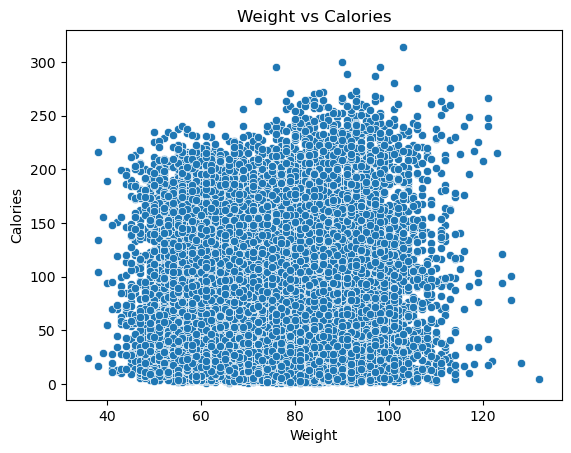

In [11]:
sns.scatterplot(x="Weight",y="Calories", data=dataset)
pyp.title("Weight vs Calories")
pyp.xlabel("Weight")
pyp.ylabel("Calories")
pyp.show()

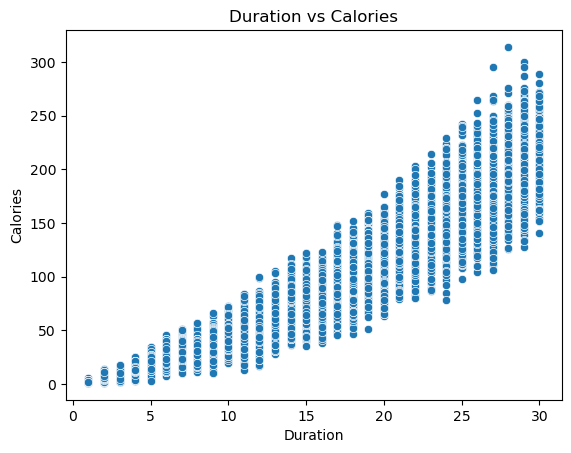

In [12]:
sns.scatterplot(x="Duration",y="Calories", data=dataset)
pyp.title("Duration vs Calories")
pyp.xlabel("Duration")
pyp.ylabel("Calories")
pyp.show()

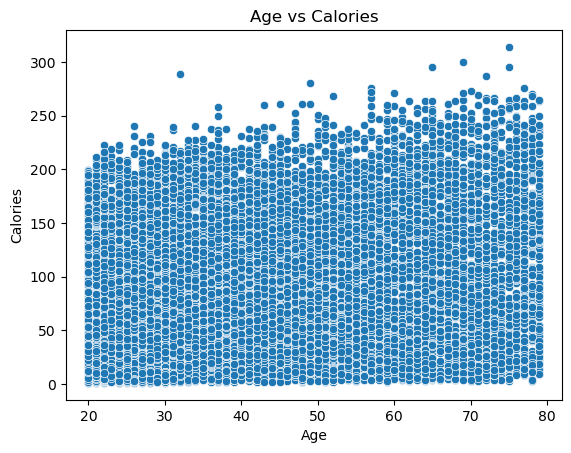

In [13]:
#from above three plots we can conclude that height and weight don't have any effect on calories burnt 
#but Duration of excercise have direct relation with that.

sns.scatterplot(x="Age",y="Calories", data=dataset)
pyp.title("Age vs Calories")
pyp.xlabel("Age")
pyp.ylabel("Calories")
pyp.show()

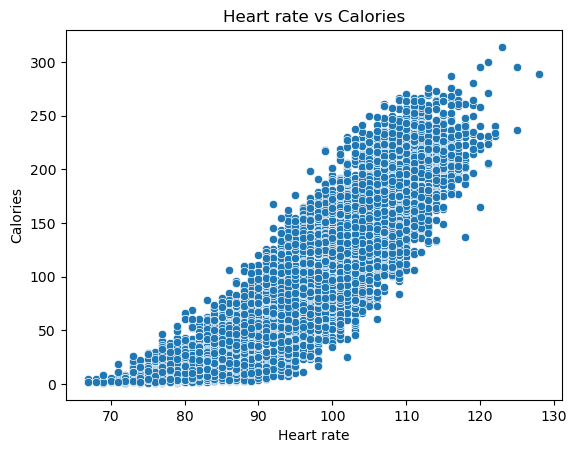

In [15]:
#age don't have effect on calories burnt.

sns.scatterplot(x="Heart_Rate",y="Calories", data=dataset)
pyp.title("Heart rate vs Calories")
pyp.xlabel("Heart rate")
pyp.ylabel("Calories")
pyp.show()

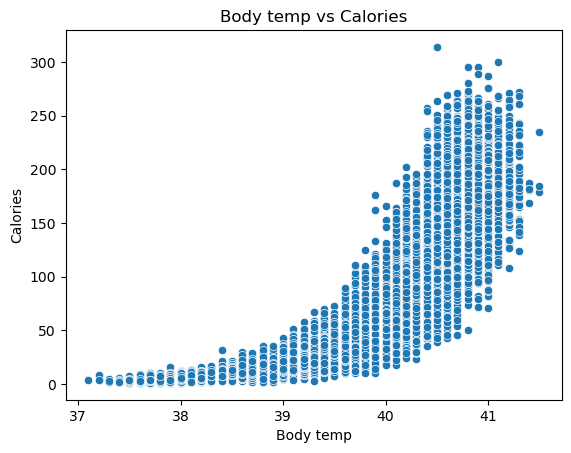

In [16]:
#if heart rate is large means calories burnt is large too.
sns.scatterplot(x="Body_Temp",y="Calories", data=dataset)
pyp.title("Body temp vs Calories")
pyp.xlabel("Body temp")
pyp.ylabel("Calories")
pyp.show()

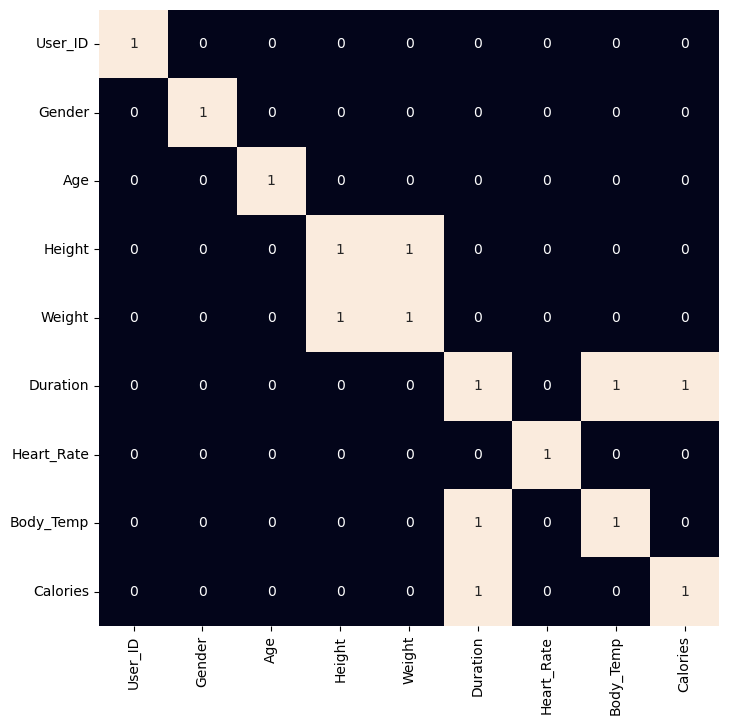

In [31]:
#if body temp increase by 39 that means calories burnt is more.

pyp.figure(figsize=(8,8))
sns.heatmap(dataset.corr()>0.9, annot=True, cbar = False)
pyp.show()

In [32]:
remove = ["Weight", "Duration"]
dataset.drop(remove,axis=1,inplace=True)

In [33]:
dataset

,User_ID,Gender,Age,Height,Heart_Rate,Body_Temp,Calories
0,14733363,1,68,190.0,105.0,40.8,231.0
1,14861698,0,20,166.0,94.0,40.3,66.0
2,11179863,1,69,179.0,88.0,38.7,26.0
3,16180408,0,34,179.0,100.0,40.5,71.0
4,17771927,0,27,154.0,81.0,39.8,35.0
...,...,...,...,...,...,...,...
14995,15644082,0,20,193.0,92.0,40.4,45.0
14996,17212577,0,27,165.0,85.0,39.2,23.0
14997,17271188,0,43,159.0,90.0,40.1,75.0
14998,18643037,1,78,193.0,84.0,38.3,11.0


In [44]:
y = dataset["Calories"].values #dependent variable
x = dataset.iloc[:,[1,2,3,4,5]].values #independent varibales

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=42)
print("The number of rows and column in x")
print(x.shape)
print("The number of rows and column in y")
print(y.shape)
print("The number of rows and column in x_train")
print(x_train.shape)
print("The number of rows and column in y_train")
print(y_train.shape)
print("The number of rows and column in x_test")
print(x_test.shape)
print("The number of rows and column in y_test")
print(y_test.shape)

The number of rows and column in x
(15000, 5)
The number of rows and column in y
(15000,)
The number of rows and column in x_train
(12000, 5)
The number of rows and column in y_train
(12000,)
The number of rows and column in x_test
(3000, 5)
The number of rows and column in y_test
(3000,)


In [47]:
LR = LinearRegression()
LR.fit(x_train,y_train)
LR

LinearRegression()

In [48]:
pred = LR.predict(x_test)
pred

array([152.52647206, 156.17199603,  73.66737243, ..., 126.68747553,
        17.92226523, 197.69868098])

In [65]:
result = pd.concat([dataset,pd.DataFrame(pred,columns=["Predicted_Calories"])], axis=1)
result

,User_ID,Gender,Age,Height,Heart_Rate,Body_Temp,Calories,Predicted_Calories
0,14733363,1,68,190.0,105.0,40.8,231.0,152.526472
1,14861698,0,20,166.0,94.0,40.3,66.0,156.171996
2,11179863,1,69,179.0,88.0,38.7,26.0,73.667372
3,16180408,0,34,179.0,100.0,40.5,71.0,158.433510
4,17771927,0,27,154.0,81.0,39.8,35.0,215.782073
...,...,...,...,...,...,...,...,...
14995,15644082,0,20,193.0,92.0,40.4,45.0,NaN
14996,17212577,0,27,165.0,85.0,39.2,23.0,NaN
14997,17271188,0,43,159.0,90.0,40.1,75.0,NaN
14998,18643037,1,78,193.0,84.0,38.3,11.0,NaN


In [66]:
r2_score(y_test,pred)

0.8722498426253136

In [67]:
#here accuracy is 87%  which not too good so we go for random forest regressor.
RFR = RandomForestRegressor()
RFR.fit(x_train,y_train)
RFR

RandomForestRegressor()

In [68]:
y_pred = RFR.predict(x_test)
result = pd.concat([result,pd.DataFrame(y_pred, columns=["Predicted_Calories_2"])],axis=1)

In [69]:
result

,User_ID,Gender,Age,Height,Heart_Rate,Body_Temp,Calories,Predicted_Calories,Predicted_Calories_2
0,14733363,1,68,190.0,105.0,40.8,231.0,152.526472,156.58
1,14861698,0,20,166.0,94.0,40.3,66.0,156.171996,160.04
2,11179863,1,69,179.0,88.0,38.7,26.0,73.667372,52.81
3,16180408,0,34,179.0,100.0,40.5,71.0,158.433510,173.24
4,17771927,0,27,154.0,81.0,39.8,35.0,215.782073,220.71
...,...,...,...,...,...,...,...,...,...
14995,15644082,0,20,193.0,92.0,40.4,45.0,NaN,NaN
14996,17212577,0,27,165.0,85.0,39.2,23.0,NaN,NaN
14997,17271188,0,43,159.0,90.0,40.1,75.0,NaN,NaN
14998,18643037,1,78,193.0,84.0,38.3,11.0,NaN,NaN


In [70]:
r2_score(y_test,y_pred)

0.9444519483511872

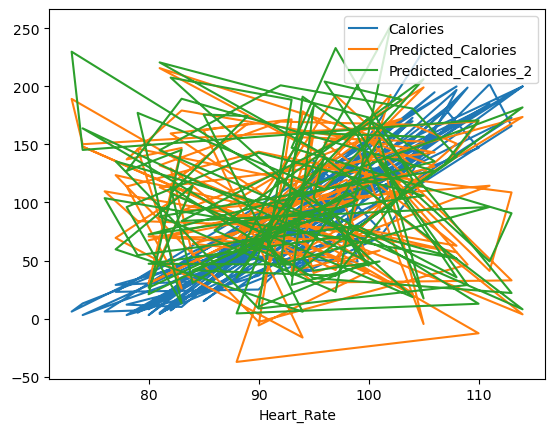

In [76]:
#the accuracy is 94% which is quite good.

result.head(100).plot(x="Heart_Rate", y=["Calories","Predicted_Calories","Predicted_Calories_2"])
pyp.show()